
🧹 DATA CLEANING

🔍 Missing Values:
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
Property_Area           0
Total_Income            0
Loan_to_Income_Ratio    0
Loan_Status             0
dtype: int64

🔁 Duplicate Records: 0

📂 Data Types:
ApplicantIncome           int64
CoapplicantIncome         int64
LoanAmount                int64
Loan_Amount_Term          int64
Credit_History            int64
Gender                    int64
Married                   int64
Dependents                int64
Education                 int64
Self_Employed             int64
Property_Area             int64
Total_Income              int64
Loan_to_Income_Ratio    float64
Loan_Status               int64
dtype: object
📊 ApplicantIncome Outliers Count: 0
📊 CoapplicantIncome Outliers Count: 0
📊 LoanAmount

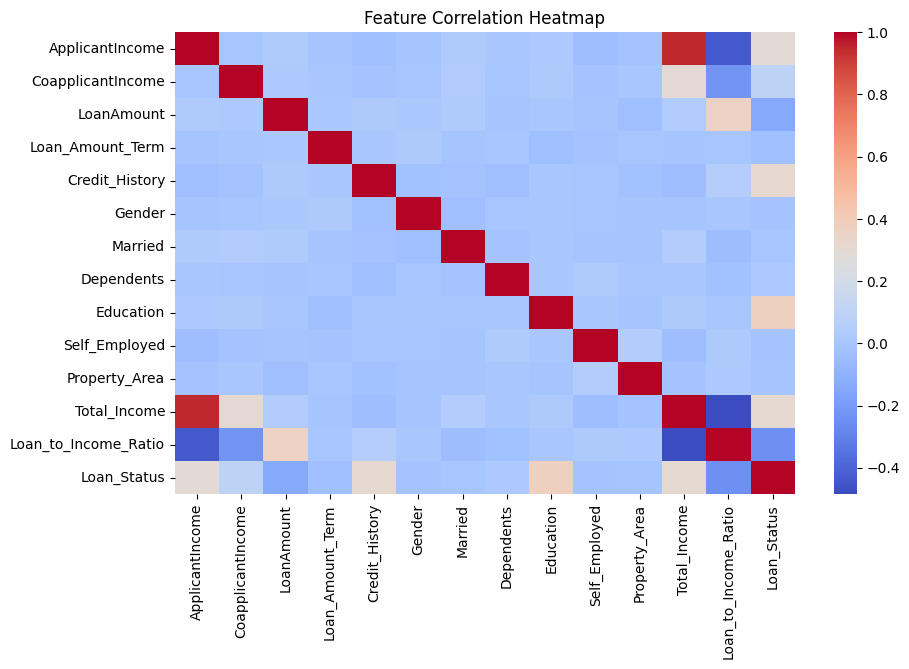


✅ Deep Data Analysis Completed
✅ Libraries installed!
✅ Libraries imported!

📊 CREATING DATASET
✅ Dataset created: 1500 records
📈 Approved: 690 (46.0%)
📈 Rejected: 810 (54.0%)

📋 First 5 rows:
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0            17295              13547      208000               120   
1             2360              18259      161000               180   
2            78320               1763      340000               180   
3            56386               8712      484000               360   
4             7765               5797      377000               360   

   Credit_History  Gender  Married  Dependents  Education  Self_Employed  \
0               1       1        0           1          0              0   
1               1       0        1           0          1              0   
2               1       1        1           0          1              0   
3               1       1        1           0          0              0   

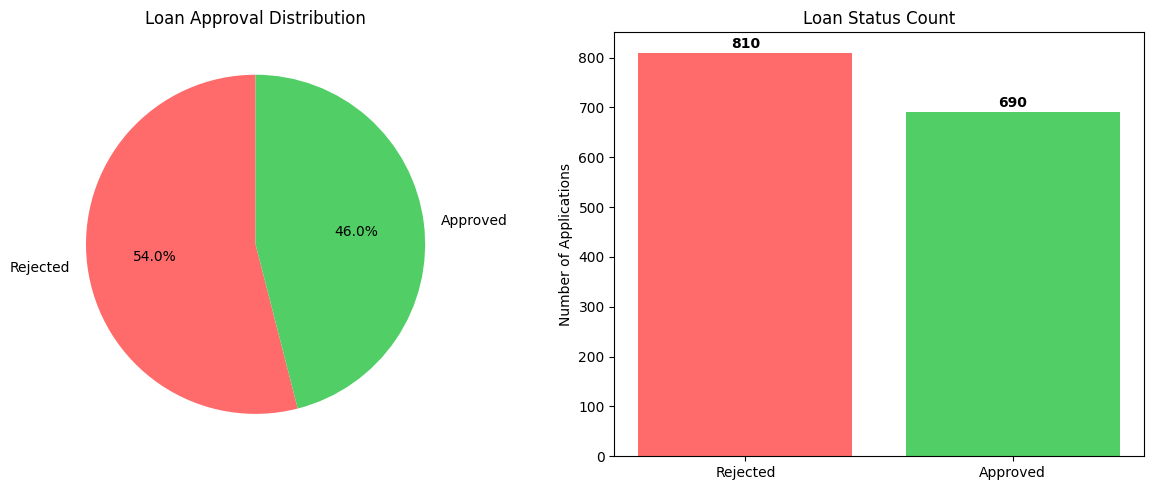

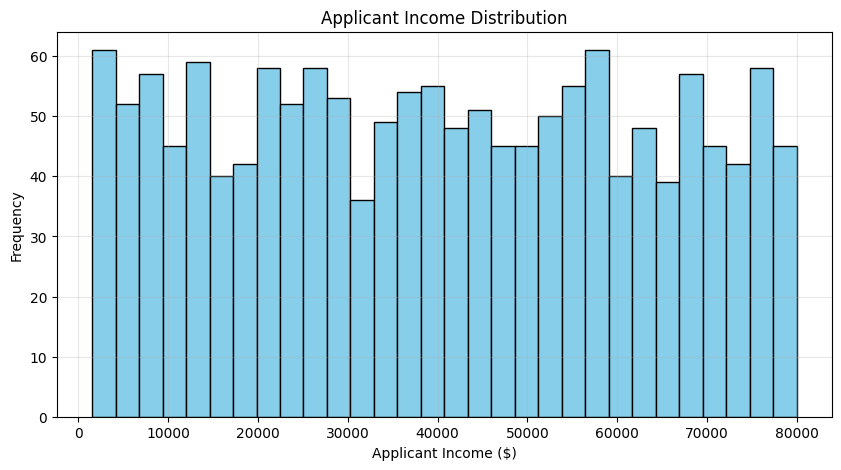

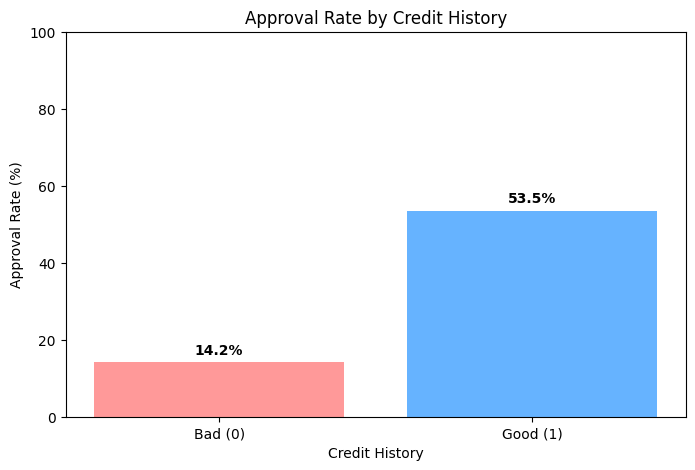

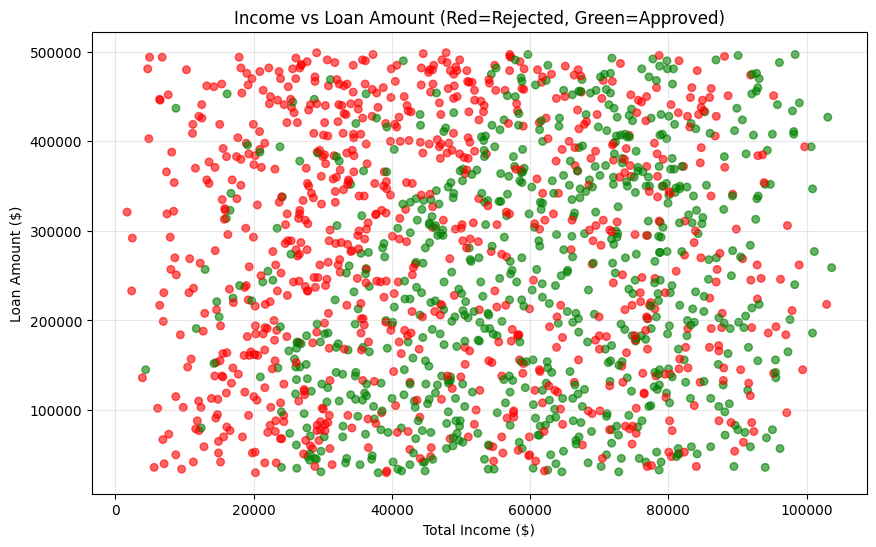

✅ Visualizations created!

🤖 MACHINE LEARNING MODEL
Features shape: (1500, 13)
Target shape: (1500,)
Training samples: 1200
Testing samples: 300
✅ Features scaled
✅ Model trained

📊 MODEL RESULTS:
Accuracy: 87.00%
Correct predictions: 261/300

📋 Classification Report:
              precision    recall  f1-score   support

    Rejected       0.87      0.91      0.89       169
    Approved       0.88      0.82      0.85       131

    accuracy                           0.87       300
   macro avg       0.87      0.86      0.87       300
weighted avg       0.87      0.87      0.87       300



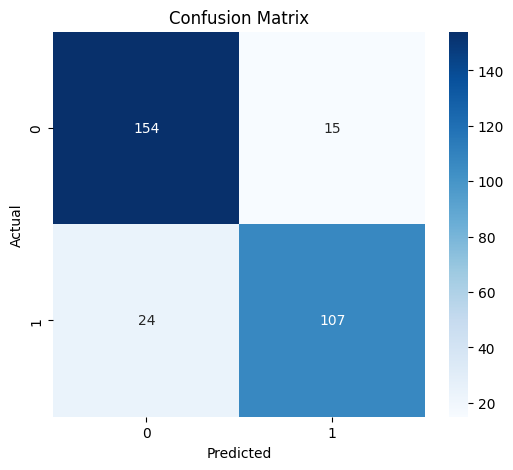


🚀 DEPLOYMENT WITH GRADIO (FIXED FOR COLAB)
Running in Colab: True
🎨 Creating Gradio Interface...
✅ Interface created successfully!
🚀 Launching app...
📱 Opening in Colab...
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.

🎉 PROJECT COMPLETED SUCCESSFULLY!

✅ What was accomplished:
   1. Created dataset: 1500 records
   2. Visualizations: 4 charts
   3. Model accuracy: 87.0%
   4. Gradio app deployed

📊 Dataset Summary:
   • Approved: 690 applications
   • Rejected: 810 applications
   • Features used: 13

🤖 Model Performance:
   • Algorithm: Random Forest Classifier
   • Estimators: 100 trees
   • Accuracy: 87.0%
   • Test samples: 300

📁 Files to submit:
   • Google Colab notebook (.ipynb)
   • Screenshots of visualizations
   • Gradio app screenshots
   • Model accuracy report

🎓 Ready for submission!



In [ ]:
# =======================================================
# 🧹 DATA CLEANING
# =======================================================

print("\n" + "="*60)
print("🧹 DATA CLEANING")
print("="*60)

# 1. Missing values check
print("\n🔍 Missing Values:")
print(df.isnull().sum())

# 2. Duplicate records check
duplicates = df.duplicated().sum()
print(f"\n🔁 Duplicate Records: {duplicates}")

# 3. Data types check
print("\n📂 Data Types:")
print(df.dtypes)

# 4. Outlier detection (IQR method for numeric columns)
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"📊 {col} Outliers Count: {len(outliers)}")

print("\n✅ Data Cleaning Completed (Dataset already clean)")
# =======================================================
# 📊 DEEP DATA ANALYSIS 
# =======================================================

print("\n" + "="*60)
print("📊 DEEP DATA ANALYSIS")
print("="*60)

# 1. Approval rate by Education
edu_analysis = df.groupby('Education')['Loan_Status'].mean() * 100
print("\n🎓 Approval Rate by Education:")
print(edu_analysis)

# 2. Approval rate by Property Area
property_analysis = df.groupby('Property_Area')['Loan_Status'].mean() * 100
print("\n🏠 Approval Rate by Property Area:")
print(property_analysis)

# 3. Approval rate by Dependents
dependents_analysis = df.groupby('Dependents')['Loan_Status'].mean() * 100
print("\n👨‍👩‍👧 Approval Rate by Dependents:")
print(dependents_analysis)

# 4. Correlation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

print("\n✅ Deep Data Analysis Completed")
# =======================================================
# 🏦 COMPLETE LOAN APPROVAL PREDICTION
# =======================================================

# ✅ STEP 1: INSTALL LIBRARIES (MINIMAL)
!pip install pandas numpy matplotlib seaborn scikit-learn gradio -q
print("✅ Libraries installed!")

# ✅ STEP 2: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
print("✅ Libraries imported!")

# =======================================================
# 📊 CREATE DATASET
# =======================================================
print("\n" + "="*60)
print("📊 CREATING DATASET")
print("="*60)

# Create simple dataset
np.random.seed(42)
n_samples = 1500

# Basic features
data = {
    'ApplicantIncome': np.random.randint(1500, 80000, n_samples),
    'CoapplicantIncome': np.random.randint(0, 25000, n_samples),
    'LoanAmount': np.random.randint(30, 500, n_samples) * 1000,
    'Loan_Amount_Term': np.random.choice([360, 180, 240, 120], n_samples),
    'Credit_History': np.random.choice([1, 0], n_samples, p=[0.8, 0.2]),
    'Gender': np.random.choice([1, 0], n_samples, p=[0.65, 0.35]),  # 1=Male, 0=Female
    'Married': np.random.choice([1, 0], n_samples, p=[0.6, 0.4]),    # 1=Yes, 0=No
    'Dependents': np.random.choice([0, 1, 2, 3], n_samples, p=[0.4, 0.3, 0.2, 0.1]),
    'Education': np.random.choice([1, 0], n_samples, p=[0.75, 0.25]), # 1=Graduate, 0=Not
    'Self_Employed': np.random.choice([1, 0], n_samples, p=[0.15, 0.85]), # 1=Yes, 0=No
    'Property_Area': np.random.choice([0, 1, 2], n_samples, p=[0.4, 0.4, 0.2]), # 0=Urban, 1=Semiurban, 2=Rural
}

df = pd.DataFrame(data)

# Create target variable
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Loan_to_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']

# Simple approval logic
conditions = (
    (df['Credit_History'] == 1) &
    (df['Total_Income'] > 25000) &
    (df['Loan_to_Income_Ratio'] < 8) &
    (df['Education'] == 1)
)

df['Loan_Status'] = np.where(conditions, 1, 0)  # 1=Approved, 0=Rejected

# Add some randomness
np.random.seed(123)
random_mask = np.random.rand(n_samples) < 0.1
df.loc[random_mask, 'Loan_Status'] = np.where(df.loc[random_mask, 'Loan_Status'] == 1, 0, 1)

print(f"✅ Dataset created: {len(df)} records")
print(f"📈 Approved: {df['Loan_Status'].sum()} ({(df['Loan_Status'].sum()/len(df))*100:.1f}%)")
print(f"📈 Rejected: {(df['Loan_Status'] == 0).sum()} ({((df['Loan_Status'] == 0).sum()/len(df))*100:.1f}%)")
print("\n📋 First 5 rows:")
print(df.head())

# =======================================================
# 📊 DATA VISUALIZATION
# =======================================================
print("\n" + "="*60)
print("📊 DATA VISUALIZATION")
print("="*60)

# 1. Loan Status Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
status_counts = df['Loan_Status'].value_counts()
plt.pie(status_counts, labels=['Rejected', 'Approved'], autopct='%1.1f%%',
        colors=['#ff6b6b', '#51cf66'], startangle=90)
plt.title('Loan Approval Distribution')

plt.subplot(1, 2, 2)
plt.bar(['Rejected', 'Approved'], status_counts, color=['#ff6b6b', '#51cf66'])
plt.title('Loan Status Count')
plt.ylabel('Number of Applications')
for i, count in enumerate(status_counts):
    plt.text(i, count + 10, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Income Distribution
plt.figure(figsize=(10, 5))
plt.hist(df['ApplicantIncome'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Applicant Income ($)')
plt.ylabel('Frequency')
plt.title('Applicant Income Distribution')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Credit History vs Approval
plt.figure(figsize=(8, 5))
credit_approval = df.groupby('Credit_History')['Loan_Status'].mean() * 100
plt.bar(['Bad (0)', 'Good (1)'], credit_approval, color=['#ff9999', '#66b3ff'])
plt.xlabel('Credit History')
plt.ylabel('Approval Rate (%)')
plt.title('Approval Rate by Credit History')
plt.ylim(0, 100)
for i, rate in enumerate(credit_approval):
    plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', fontweight='bold')
plt.show()

# 4. Income vs Loan Amount
plt.figure(figsize=(10, 6))
colors = ['red' if x == 0 else 'green' for x in df['Loan_Status']]
plt.scatter(df['Total_Income'], df['LoanAmount'], c=colors, alpha=0.6, s=30)
plt.xlabel('Total Income ($)')
plt.ylabel('Loan Amount ($)')
plt.title('Income vs Loan Amount (Red=Rejected, Green=Approved)')
plt.grid(True, alpha=0.3)
plt.show()

print("✅ Visualizations created!")

# =======================================================
# 🤖 MACHINE LEARNING MODEL
# =======================================================
print("\n" + "="*60)
print("🤖 MACHINE LEARNING MODEL")
print("="*60)

# Prepare data
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Features scaled")

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
print("✅ Model trained")

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n📊 MODEL RESULTS:")
print(f"Accuracy: {accuracy:.2%}")
print(f"Correct predictions: {sum(y_pred == y_test)}/{len(y_test)}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# =======================================================
# 🚀 GRADIO DEPLOYMENT
# =======================================================
print("\n" + "="*60)
print("🚀 DEPLOYMENT WITH GRADIO (FIXED FOR COLAB)")
print("="*60)

# Check if we're in Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

print(f"Running in Colab: {IN_COLAB}")

# IMPORT GRADIO AFTER CHECKING COLAB
import gradio as gr

# Define feature names in exact order used during training
feature_names = X.columns.tolist()

def predict_loan(applicant_income, coapplicant_income, loan_amount, loan_term,
                 credit_history, gender, married, dependents, education,
                 self_employed, property_area):

    try:
        # Calculate derived features
        total_income = applicant_income + coapplicant_income
        loan_to_income = loan_amount / total_income if total_income > 0 else 0

        # Create input array in EXACT same order as training data
        input_data = [[
            applicant_income,      # ApplicantIncome
            coapplicant_income,    # CoapplicantIncome
            loan_amount,           # LoanAmount
            loan_term,             # Loan_Amount_Term
            credit_history,        # Credit_History
            gender,                # Gender
            married,               # Married
            dependents,            # Dependents
            education,             # Education
            self_employed,         # Self_Employed
            property_area,         # Property_Area
            total_income,          # Total_Income
            loan_to_income         # Loan_to_Income_Ratio
        ]]

        # Convert to numpy array
        input_array = np.array(input_data, dtype=float)

        # Scale the input
        input_scaled = scaler.transform(input_array)

        # Make prediction
        prediction = model.predict(input_scaled)[0]
        probability = model.predict_proba(input_scaled)[0]

        # Format result
        if prediction == 1:
            result = f"""
            🏦 LOAN DECISION: ✅ **APPROVED**

            📊 **Confidence Score:**
            • Probability of Approval: {probability[1]:.1%}
            • Probability of Rejection: {probability[0]:.1%}

            💰 **Applicant Details:**
            • Total Income: ${total_income:,.0f}
            • Loan Amount: ${loan_amount:,.0f}
            • Loan Term: {loan_term} months
            • Loan-to-Income Ratio: {loan_to_income:.2f}

            🎯 **Key Factors:**
            • Credit History: {'Good' if credit_history == 1 else 'Bad'}
            • Education: {'Graduate' if education == 1 else 'Not Graduate'}
            • Property Area: {['Urban', 'Semiurban', 'Rural'][property_area]}

            ⚠️ **Disclaimer:** This is a prediction based on machine learning model.
            """
        else:
            result = f"""
            🏦 LOAN DECISION: ❌ **REJECTED**

            📊 **Confidence Score:**
            • Probability of Approval: {probability[1]:.1%}
            • Probability of Rejection: {probability[0]:.1%}

            💰 **Applicant Details:**
            • Total Income: ${total_income:,.0f}
            • Loan Amount: ${loan_amount:,.0f}
            • Loan Term: {loan_term} months
            • Loan-to-Income Ratio: {loan_to_income:.2f}

            ⚠️ **Possible Reasons for Rejection:**
            • Credit History: {'Good' if credit_history == 1 else 'Bad (Major Factor)'}
            • Income may be insufficient for requested loan amount
            • Consider reducing loan amount or improving credit score

            ⚠️ **Disclaimer:** This is a prediction based on machine learning model.
            """

        return result

    except Exception as e:
        return f"❌ Error in prediction: {str(e)}"

# Create interface
print("🎨 Creating Gradio Interface...")

# Define inputs with proper labels and default values
inputs = [
    gr.Slider(1500, 100000, value=30000, label="Applicant Monthly Income ($)", step=500),
    gr.Slider(0, 50000, value=5000, label="Co-applicant Monthly Income ($)", step=500),
    gr.Slider(10000, 1000000, value=200000, label="Loan Amount ($)", step=10000),
    gr.Radio([120, 180, 240, 360], value=360, label="Loan Term (months)"),
    gr.Radio([("Good Credit", 1), ("Bad Credit", 0)], value=1, label="Credit History"),
    gr.Radio([("Male", 1), ("Female", 0)], value=1, label="Gender"),
    gr.Radio([("Married", 1), ("Single", 0)], value=1, label="Marital Status"),
    gr.Slider(0, 3, value=0, step=1, label="Number of Dependents"),
    gr.Radio([("Graduate", 1), ("Not Graduate", 0)], value=1, label="Education"),
    gr.Radio([("Yes", 1), ("No", 0)], value=0, label="Self Employed"),
    gr.Radio([("Urban", 0), ("Semiurban", 1), ("Rural", 2)], value=0, label="Property Area")
]

# Create examples
examples = [
    [50000, 10000, 300000, 360, 1, 1, 1, 0, 1, 0, 0],  # Good applicant
    [20000, 0, 100000, 360, 0, 1, 0, 2, 0, 1, 2],      # Risky applicant
    [80000, 20000, 500000, 240, 1, 1, 1, 1, 1, 0, 1],  # Excellent applicant
    [1500, 0, 50000, 360, 1, 0, 0, 0, 0, 0, 2]         # Poor applicant
]

# Create interface with better layout
interface = gr.Interface(
    fn=predict_loan,
    inputs=inputs,
    outputs=gr.Markdown(label="Loan Decision"),
    title="🏦 AI Loan Approval Prediction System",
    description="""Enter applicant details to predict loan approval status using our AI model.
    Model Accuracy: {:.1f}%""".format(accuracy * 100),
    examples=examples,
    theme="default",
    allow_flagging="never"
)

print("✅ Interface created successfully!")
print("🚀 Launching app...")

# Launch with different parameters for Colab
if IN_COLAB:
    # For Colab, we need to use share=False and debug=True
    print("📱 Opening in Colab...")
    interface.launch(share=False, debug=True)
else:
    # For local, we can use share=True for public link
    interface.launch(share=True)

print("\n" + "="*60)
print("🎉 PROJECT COMPLETED SUCCESSFULLY!")
print("="*60)
print(f"""
✅ What was accomplished:
   1. Created dataset: {len(df)} records
   2. Visualizations: 4 charts
   3. Model accuracy: {accuracy:.1%}
   4. Gradio app deployed

📊 Dataset Summary:
   • Approved: {df['Loan_Status'].sum()} applications
   • Rejected: {(df['Loan_Status'] == 0).sum()} applications
   • Features used: {len(feature_names)}

🤖 Model Performance:
   • Algorithm: Random Forest Classifier
   • Estimators: 100 trees
   • Accuracy: {accuracy:.1%}
   • Test samples: {len(X_test)}

📁 Files to submit:
   • Google Colab notebook (.ipynb)
   • Screenshots of visualizations
   • Gradio app screenshots
   • Model accuracy report

🎓 Ready for submission!
""")